In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style("whitegrid")

In [4]:
# Applying gradient descent algorithm 

theta= 3
alpha = 0.1
data = []

for i in range(0,10):
    res = alpha * 2 * theta # update rule 
    print("{0:.4f}  {1:.4f}".format(theta, res))
    data.append([theta, theta**2])
    theta = theta - res

3.0000  0.6000
2.4000  0.4800
1.9200  0.3840
1.5360  0.3072
1.2288  0.2458
0.9830  0.1966
0.7864  0.1573
0.6291  0.1258
0.5033  0.1007
0.4027  0.0805


In [5]:
tmp = pd.DataFrame(data)
tmp

,0,1
0,3.000000,9.000000
1,2.400000,5.760000
2,1.920000,3.686400
3,1.536000,2.359296
4,1.228800,1.509949
5,0.983040,0.966368
6,0.786432,0.618475
7,0.629146,0.395824
8,0.503316,0.253327
9,0.402653,0.162130


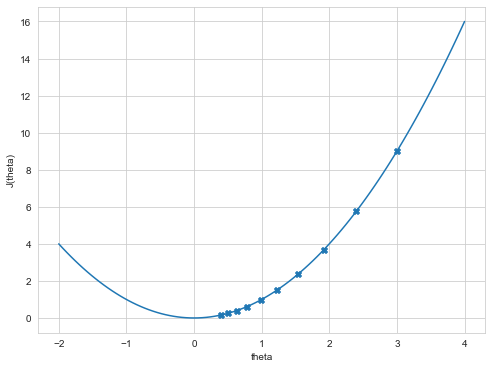

In [7]:
# plotting 
plt.figure(figsize=(8,6))
plt.plot(np.linspace(-2, 4, 100), np.linspace(-2, 4, 100) **2);
plt.scatter(tmp.iloc[:,0], tmp.iloc[:,1], marker= 'X');
plt.xlabel('theta');
plt.ylabel('J(theta)');

#### Second Example


$$J(\theta) = \theta^4 + \theta^2$$
$$\frac{d}{d\theta}.J(\theta) = 4\theta^3 + 2\theta$$
$$\theta:= \theta-\alpha . (4\theta^3 + 2\theta)$$

In [1]:
theta = 3
alpha = 0.01
data = []

for i in range(0,10):
    res = alpha * (4* theta **3 + 2*theta)  # update function 
    print("{0:.4f}  {1:.4f}".format(theta, res))
    data.append([theta, theta**4 + theta**2])
    theta = theta - res

3.0000  1.1400
1.8600  0.2946
1.5654  0.1847
1.3807  0.1329
1.2478  0.1027
1.1451  0.0830
1.0621  0.0692
0.9930  0.0590
0.9339  0.0513
0.8827  0.0452


In [4]:
tmp = pd.DataFrame(data)
tmp

,0,1
0,3.000000,90.000000
1,1.860000,15.428432
2,1.565406,8.455422
3,1.380657,5.539863
4,1.247771,3.980968
5,1.145108,3.030703
6,1.062144,2.400869
7,0.992970,1.958167
8,0.933949,1.633098
9,0.882684,1.386175


Text(0, 0.5, 'J(theta)')

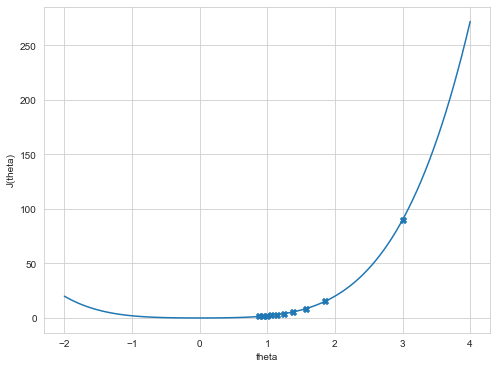

In [6]:
# plotting 
plt.figure(figsize=(8,6))
x_grid = np.linspace(-2, 4, 100)
plt.plot(x_grid, x_grid**4 + x_grid**2);
plt.scatter(tmp.iloc[:,0], tmp.iloc[:,1], marker='X');
plt.xlabel('theta')
plt.ylabel('J(theta)')

# Applying Gradient Descent Algorithm to Boston House Data

In [7]:
from sklearn.datasets import load_boston
# loading boston house data
boston_data = load_boston()
# making a dataframae for boston house data
df = pd.DataFrame(boston_data.data, columns= boston_data.feature_names)
# visualize dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# taking one feature 
X = df[['LSTAT']].values
# targets
y = boston_data.target

In [11]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

In [14]:
print("For X: ")
for i in range(5):
    print(X[i])
print('=================================================')
print("For X_std: ")
for i in range(5):
    print(X_std[i])
print('=================================================')
print("For y: ")
for i in range(5):
    print(y[i])
print('=================================================')
print("For y_std: ")
for i in range(5):
    print(y_std[i])
print('=================================================')
print("Shape of X_std: ", X_std.shape)
print("Shape of y_std: ", y_std.shape)

For X: 
[4.98]
[9.14]
[4.03]
[2.94]
[5.33]
For X_std: 
[-1.0755623]
[-0.49243937]
[-1.2087274]
[-1.36151682]
[-1.02650148]
For y: 
24.0
21.6
34.7
33.4
36.2
For y_std: 
0.1596856587150597
-0.1015242873296184
1.3242466681642504
1.1827579473900494
1.4875028844421743
Shape of X_std:  (506, 1)
Shape of y_std:  (506,)


In [21]:
alpha = 0.0001
w_ = np.zeros(1+ X_std.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X_std, w_[1:]) + w_[0]
    errors = (y_std - y_pred)
    
    # updatig weights 
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)
    

Text(0.5, 0, 'Epoch')

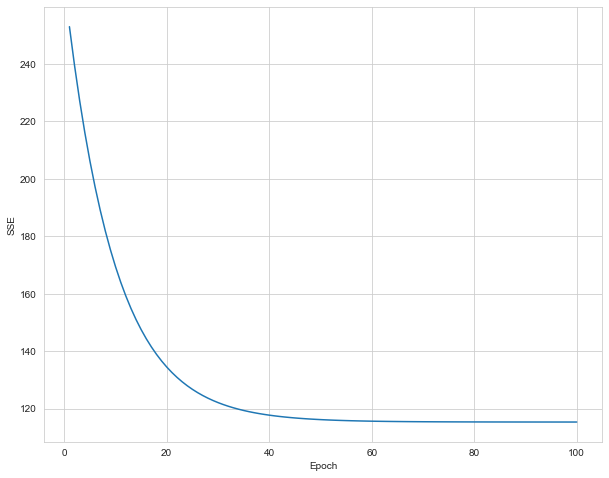

In [22]:
# plot 
plt.figure(figsize=(10,8))
plt.plot(range(1, n_ + 1), cost_);
plt.ylabel('SSE')
plt.xlabel('Epoch')